In [1]:
#!wget http://www.ccl.kuleuven.be/Courses/scripting/assignment3/arabian_nights_n100.zip
#!unzip arabian_nights_n100.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find either arabian_nights_n100.zip or arabian_nights_n100.zip.zip.


In [3]:
import os
os.getcwd()

'C:\\Users\\HP'

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [36]:
## INSERT YOUR CODE HERE
from nltk.tokenize import word_tokenize, sent_tokenize
from itertools import chain

import re
import os
import pandas as pd

class TextAnalysis:

    __slots__ = ["sentence_tokens", "_average_word_length", "_type_token_ratio",
                 "_hapax_ratio", "_average_sentence_length"]

    def __init__(self, path: str):
        if not os.path.exists(path):
            raise FileNotFoundError

        with open(path, "r") as F:
            # punctuation pattern
            punct_pattern = re.compile(r"[^\w\s\d\']+")
            data = F.read()
            # make data lowercase and break document into sentences
            sentences = sent_tokenize(data.lower())
            # remove punctuation from individual sentences
            sentences_without_punctuation = [punct_pattern.sub("", sentence) for sentence in sentences]
            # tokenize sentences
            self.sentence_tokens = [word_tokenize(sentence) for sentence in sentences_without_punctuation]

        ## Compute statistics once here. between calls they don't change so we compute them immediately
        # accumulator(s)
        num_characters = 0
        unique_words = set()

        # loop over tokenized sentences
        for sentence_token in self.sentence_tokens:
            # add total word length(s) to accumulator
            num_characters += sum(map(len, sentence_token))
            unique_words.update(sentence_token)

        num_unique_words = len(unique_words)
        num_total_words = sum(map(len, self.sentence_tokens))

        # divide by total number of words.
        self._average_word_length = round(num_characters / num_total_words)
        self._type_token_ratio = num_unique_words / num_total_words

        self._average_sentence_length = round(num_total_words / len(self.sentence_tokens))

        # find unique words
        df = pd.DataFrame(chain(*self.sentence_tokens), columns=["words"])
        counts = df.groupby("words")["words"].count()
        self._hapax_ratio = len(counts[counts == 1]) / num_total_words

    def average_word_length(self):
        return self._average_word_length

    def type_token_ratio(self):
        return self._type_token_ratio

    def hapax_ratio(self):
        return self._hapax_ratio

    def average_sentence_length(self):
        return self._average_sentence_length

if __name__ == "__main__":
    ana = TextAnalysis("C:/Users/HP/OneDrive/Desktop/ignacy/arabian_nights/1.txt")
    print(ana.average_word_length())
    print(ana.hapax_ratio())
    print(ana.type_token_ratio())
    print(ana.average_sentence_length())




4
0.11690599947141221
0.20051096819663466
30


## Use your TextAnalysis class to process the first 100 nights of the One Thousand and One Nights. 

In [41]:
import pandas as pd

df = pd.DataFrame(columns=["file", "average_word_length", "type_token_ratio", "hapax_ratio", "average_sentence_length"])

path_list = []
for root, folder, files in os.walk("C:/Users/HP/OneDrive/Desktop/ignacy/arabian_nights/"):
  for file in files:
    path = os.path.join(root, file)
    path_list.append(path)

df["file"] = path_list
for index, row in df.iterrows():
    ta = TextAnalysis(row["file"])

    row["average_word_length"] = ta.average_word_length()
    row["type_token_ratio"] = ta.type_token_ratio()
    row["hapax_ratio"] = ta.hapax_ratio()
    row["average_sentence_length"] = ta.average_sentence_length()

df.head()


,file,average_word_length,type_token_ratio,hapax_ratio,average_sentence_length
0,C:/Users/HP/OneDrive/Desktop/ignacy/arabian_ni...,4,0.200511,0.116906,30
1,C:/Users/HP/OneDrive/Desktop/ignacy/arabian_ni...,4,0.271138,0.172216,27
2,C:/Users/HP/OneDrive/Desktop/ignacy/arabian_ni...,4,0.352012,0.237392,30
3,C:/Users/HP/OneDrive/Desktop/ignacy/arabian_ni...,4,0.302439,0.189493,35
4,C:/Users/HP/OneDrive/Desktop/ignacy/arabian_ni...,4,0.319872,0.211859,35


In [46]:
df.shape

(100, 5)

## Compute the correlation between the type_token_ratio and the hapax_ratio for the 100 nights. Also create a linear regression plot in order to represent this correlation visually.

In [61]:
# Check dataframe dtypes
df.dtypes

file                       object
average_word_length        object
type_token_ratio           object
hapax_ratio                object
average_sentence_length    object
dtype: object

In [62]:
#Transform into float to get the correlations (Correlation only works with float objects)
df['type_token_ratio'] = df['type_token_ratio'].astype(float)
df['hapax_ratio'] = df['hapax_ratio'].astype(float)
# average sentance length can be int
df['average_sentence_length'] = df['average_sentence_length'].astype(int)

In [63]:
correlation = df[['type_token_ratio', 'hapax_ratio']].corr(method='pearson')

In [64]:
#These are very highly correlated (almost 1!)
correlation

,type_token_ratio,hapax_ratio
type_token_ratio,1.000000,0.990106
hapax_ratio,0.990106,1.000000


In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

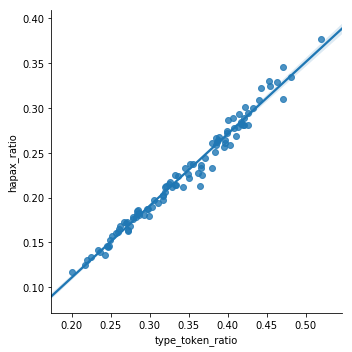

In [69]:
#Regression plot
sns.lmplot(x="type_token_ratio", y="hapax_ratio", data=df);